## PHASE 1 PROJECT- MOVIES DATA ANALYSIS

### BUSINESS PROBLEM

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create

### PROJECT MAIN OBJECTIVE

In this project, I will use exploratory data analysis to generate insights for the Microsoft stakeholder.

### SPECIFIC OBJECTIVES

- **This project's value is in helping a this specific stakeholder solve a real-world problem by exploring the following insights**.

- Understanding what content is available in different countries
- Types of studios that are currently doing best in movie making.
- Identifying similar content by matching text-based features
- Network analysis of Actors / Directors and find interesting insights
- Analysing whether Microsoft should put more focus on TV Shows than movies in recent years.

In [2]:
pip install pandoc

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 127.0/127.0 kB 41.8 kB/s eta 0:00:00
     --------------------------------------- 49.6/49.6 kB 81.3 kB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33263 sha256=c92e6928bb6383352be28d6dbbfb53b9a41b71bf7c9ba1d5438bcc3051f1247a
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\69\e6\a1\1daa96d919c9e09a71473649b717b8da286f3f8d7719d1cfc5
Successfully built pandoc
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
movie_gross=pd.read_csv('/content/bom.movie_gross.csv')
movie_gross.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010


In [6]:
basics=pd.read_csv('/content/title.basics.csv')
basics.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [5]:
ratings=pd.read_csv("/content/title.ratings.csv")
ratings.head(2)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [7]:
#checking shape for df1 dataset
movie_gross.shape

(3387, 5)

In [8]:
#checking shape for df2 dataset
basics.shape

(146144, 6)

In [9]:
#checking shape for df3 dataset
ratings.shape

(73856, 3)

In [11]:
df0=ratings.merge(basics, on = 'tconst', how = 'inner')
df0.head(2)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary


In [13]:
df0.shape

(73856, 8)

In [14]:
#concatenating the df0 on df
df = pd.concat([movie_gross,df0])
df.head(2)

,title,studio,domestic_gross,foreign_gross,year,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#checking for missing values
df.isna().sum()

title              73856
studio             73861
domestic_gross     73884
foreign_gross      75206
year               73856
tconst              3387
averagerating       3387
numvotes            3387
primary_title       3387
original_title      3387
start_year          3387
runtime_minutes    11007
genres              4191
dtype: int64

- **filling missing values on columns with mean**

In [16]:
df.domestic_gross.fillna(df.domestic_gross.mean(),inplace=True)

In [17]:
df.foreign_gross.fillna(df.foreign_gross.mean(),inplace=True)

In [18]:
df.averagerating.fillna(df.averagerating.mean(),inplace=True)

In [19]:
df.numvotes.fillna(df.numvotes.mean(),inplace=True)

In [20]:
df.runtime_minutes.fillna(df.runtime_minutes.mean(),inplace=True)

- **Filling and dropping missing values**

In [21]:
df['genres'].fillna('Unknown_genres', inplace=True)

In [22]:
df['studio'].dropna(inplace=True)

In [23]:
df['year'].dropna(inplace=True)

In [24]:
df['start_year'].dropna(inplace=True)

In [26]:
df.drop(['original_title'], axis=1).head(3)

,title,studio,domestic_gross,foreign_gross,year,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000.0,2010.0,NaN,6.332729,3523.662167,NaN,NaN,94.65404,Unknown_genres
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010.0,NaN,6.332729,3523.662167,NaN,NaN,94.65404,Unknown_genres
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010.0,NaN,6.332729,3523.662167,NaN,NaN,94.65404,Unknown_genres


In [27]:
mode_value1=df['year'].mode()[0]
mode_value1

2015.0

In [28]:
df['year'].fillna(mode_value1, inplace=True)

In [29]:
mode_value=df['start_year'].mode()[0]
mode_value

2016.0

In [30]:
df['start_year'].fillna(mode_value, inplace=True)

In [31]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77243 entries, 0 to 73855
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3387 non-null   object 
 1   studio           3382 non-null   object 
 2   domestic_gross   77243 non-null  float64
 3   foreign_gross    77243 non-null  float64
 4   year             77243 non-null  float64
 5   tconst           73856 non-null  object 
 6   averagerating    77243 non-null  float64
 7   numvotes         77243 non-null  float64
 8   primary_title    73856 non-null  object 
 9   original_title   73856 non-null  object 
 10  start_year       77243 non-null  float64
 11  runtime_minutes  77243 non-null  float64
 12  genres           77243 non-null  object 
dtypes: float64(7), object(6)
memory usage: 8.3+ MB


In [32]:
df.head(3)


,title,studio,domestic_gross,foreign_gross,year,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000.0,2010.0,NaN,6.332729,3523.662167,NaN,NaN,2016.0,94.65404,Unknown_genres
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010.0,NaN,6.332729,3523.662167,NaN,NaN,2016.0,94.65404,Unknown_genres
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010.0,NaN,6.332729,3523.662167,NaN,NaN,2016.0,94.65404,Unknown_genres


## EXPLORATORY DATA ANALYSIS


- **Checking for outliers**




<Axes: title={'center': 'Boxplot to detect outliers for averagerating'}, xlabel='averagerating'>

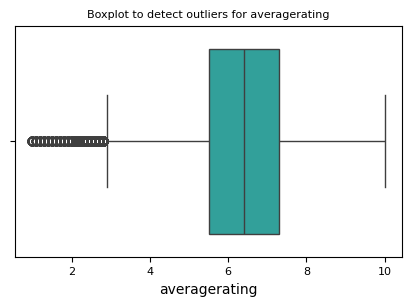

In [97]:
#a boxplot to visualize distribution of any outliers in avearagerating
plt.figure(figsize=(5,3))
plt.title('Boxplot to detect outliers for averagerating', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.boxplot(x=df['averagerating'],color='lightseagreen')

<Axes: title={'center': 'Boxplot to detect outliers for numvotes'}, xlabel='numvotes'>

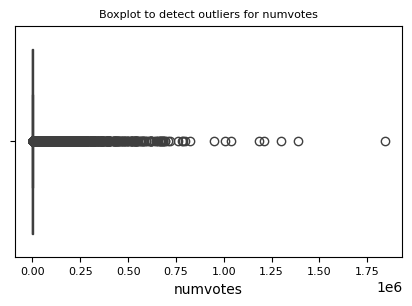

In [98]:
#a boxplot to visualize distribution of any outliers in numvotes
plt.figure(figsize=(5,3))
plt.title('Boxplot to detect outliers for numvotes', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.boxplot(x=df['numvotes'])

<Axes: title={'center': 'Boxplot to detect outliers for domestics gross'}, xlabel='domestic_gross'>

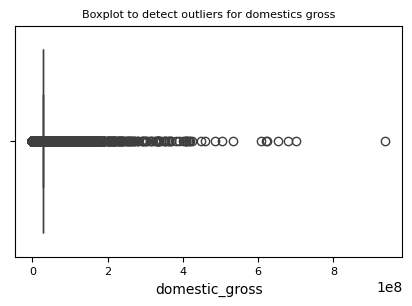

In [99]:
#a boxplot to visualize distribution of any outliers in domestics gross
plt.figure(figsize=(5,3))
plt.title('Boxplot to detect outliers for domestics gross', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.boxplot(x=df['domestic_gross'])

<Axes: title={'center': 'Boxplot to detect outliers for runtime_minutes'}, xlabel='runtime_minutes'>

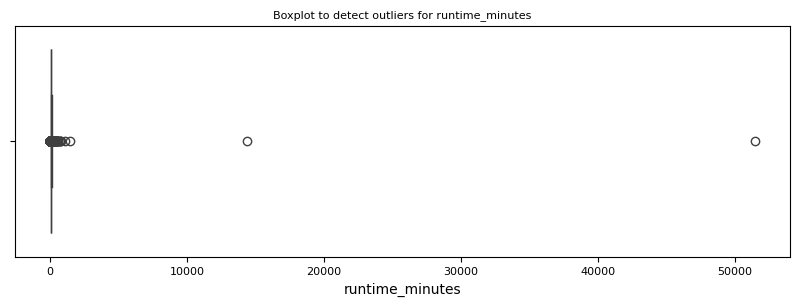

In [88]:
#a boxplot to visualize distribution of any outliers in runtime minutes
plt.figure(figsize=(10,3))
plt.title('Boxplot to detect outliers for runtime_minutes', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.boxplot(x=df['runtime_minutes'])

In [34]:
df.head(2)

,title,studio,domestic_gross,foreign_gross,year,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000.0,2010.0,NaN,6.332729,3523.662167,NaN,NaN,2016.0,94.65404,Unknown_genres
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010.0,NaN,6.332729,3523.662167,NaN,NaN,2016.0,94.65404,Unknown_genres


In [35]:
#determining top genres
top_10_genres = pd.DataFrame(df['genres'].value_counts().head(10))
top_10_genres

,genres
Drama,11612
Documentary,10313
Comedy,5613
Unknown_genres,4191
Horror,2692
"Comedy,Drama",2617
Thriller,1555
"Drama,Romance",1510
"Comedy,Romance",1236
"Comedy,Drama,Romance",1208


<Figure size 100x100 with 0 Axes>

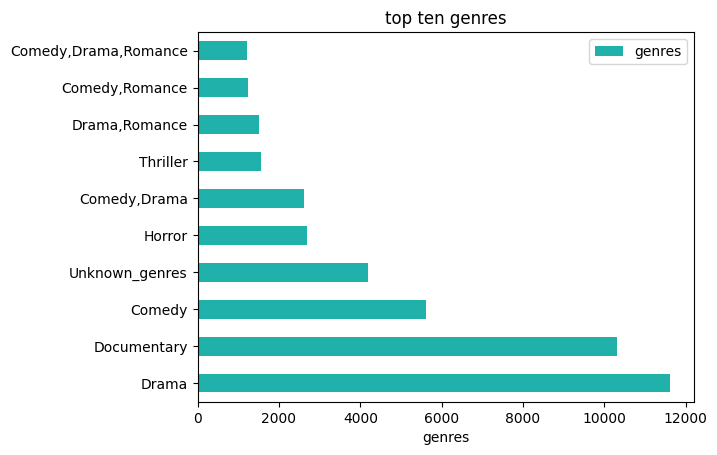

In [93]:
#a bar chart to top  genres by movie titles
plt.figure(figsize=(1,1))
top_10_genres.plot(kind='barh', color='lightseagreen')
plt.title('top ten genres')
plt.xlabel("genres")
plt.show()

In [ ]:
#determining top studios
top_10_studios=pd.DataFrame(df['studio'].value_counts().head(10))
top_10_studios

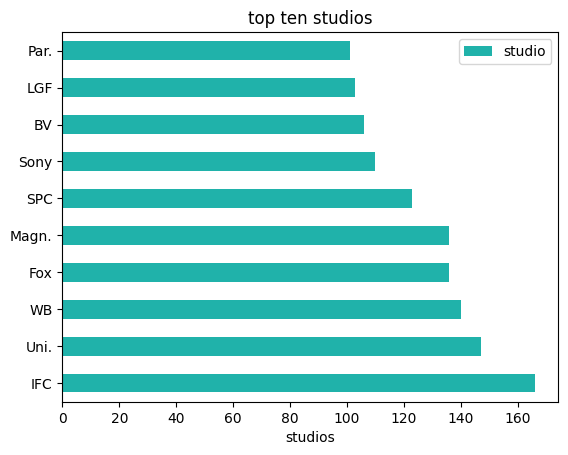

In [92]:
#bar chart to represent  to ten studios in the industry
top_10_studios.plot(kind='barh', color='lightseagreen')
plt.title('top ten studios')
plt.xlabel("studios")
plt.show()

In [40]:
#importing budgets dataset to analyze profits
budgets=pd.read_csv('/content/tn.movie_budgets.csv')
budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,425000000,760507625,2776345279
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875


In [41]:
#creating the profits column
budgets['profits']=budgets['worldwide_gross']-budgets['production_budget']
budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profits
0,1,18-Dec-09,Avatar,425000000,760507625,2776345279,2351345279
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875


In [58]:
#renaming movie  column to title
budgets.rename(columns = {'title':'primary_title'}, inplace = True)

In [59]:
budgets.columns

Index(['id', 'release_date', 'primary_title', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'profits'],
      dtype='object')

In [60]:
df0.columns

Index(['tconst', 'averagerating', 'numvotes', 'primary_title',
       'original_title', 'start_year', 'runtime_minutes', 'genres'],
      dtype='object')

In [61]:
#merging df0 to the new dataset called budgets
df6=pd.merge(df0,budgets, on='primary_title')

In [55]:
df0

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [62]:
#Finding the most profitable genres
profits_by_genre = pd.DataFrame(df6.groupby(['genres'])['profits'].sum())
J=profits_by_genre.sort_values( by ='profits',ascending=False).head(10)
J

,profits
genres,
"Action,Adventure,Sci-Fi",25434152015
"Adventure,Animation,Comedy",20347160147
"Action,Adventure,Fantasy",8711757789
Drama,7678410452
"Action,Adventure,Comedy",7068300318
"Action,Adventure,Animation",5478379310
Horror,5010270640
"Adventure,Family,Fantasy",3838998673
Documentary,3815704039


<Axes: ylabel='genres'>

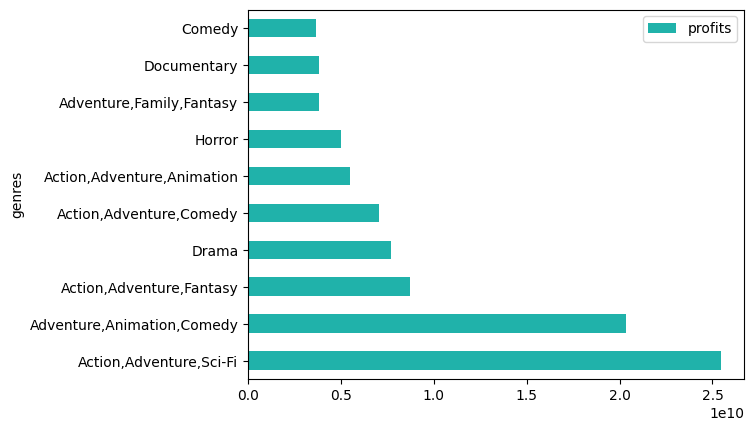

In [81]:
#a bar chart to show top of genres by profit
J.plot(kind='barh', color='lightseagreen')

In [64]:
df6.columns

Index(['tconst', 'averagerating', 'numvotes', 'primary_title',
       'original_title', 'start_year', 'runtime_minutes', 'genres', 'id',
       'release_date', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'profits'],
      dtype='object')

Trend in movie production over the years

Text(0.5, 1.0, 'Total Domestic Gross')

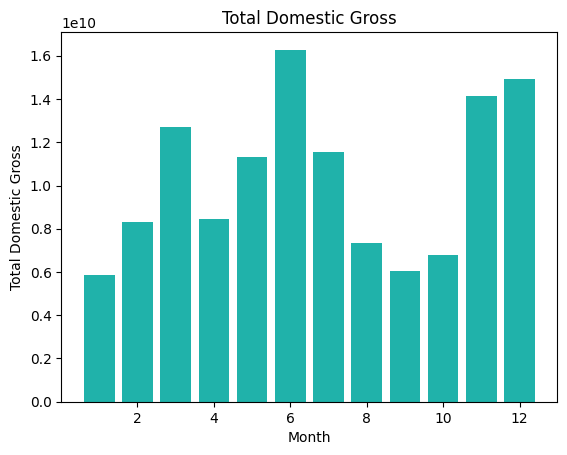

In [84]:
# Convert release date to datetime format
df6['release_date'] = pd.to_datetime(df6['release_date'])

# Extract month from release date
df6['Release Month'] = df6['release_date'].dt.month

# Group by month and calculate total domestic gross
monthly_domestic_gross = df6.groupby('Release Month')['domestic_gross'].sum()

# Plot bar chart
plt.bar(monthly_domestic_gross.index, monthly_domestic_gross.values, color='lightseagreen')

# Customize plot
plt.xlabel('Month')
plt.ylabel('Total Domestic Gross')
plt.title('Total Domestic Gross')

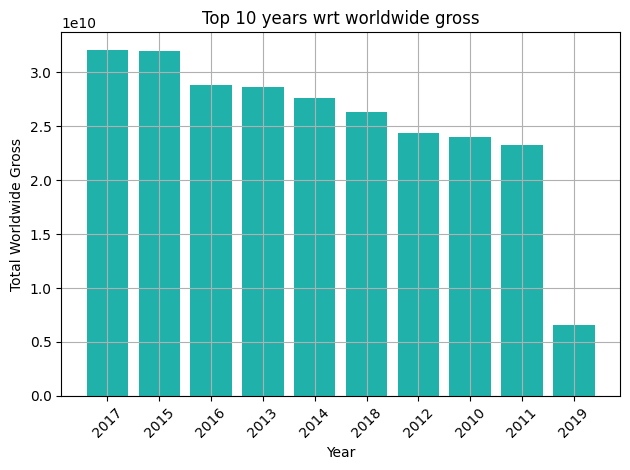

In [85]:
# Convert release date to datetime format and extract release year
df6['Release Year'] = pd.to_datetime(df6['release_date']).dt.year

# Group by year and calculate total worldwide gross
yearly_worldwide_gross = df6.groupby('Release Year')['worldwide_gross'].sum()


# Sort years based on total worldwide gross and select top 10 years
top_10_years = yearly_worldwide_gross.sort_values(ascending=False).head(10)

# Plot bar chart
plt.bar(top_10_years.index.astype(str), top_10_years.values, color='lightseagreen')

# Customize plot
plt.xlabel('Year')
plt.ylabel('Total Worldwide Gross')
plt.title('Top 10 years wrt worldwide gross')
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

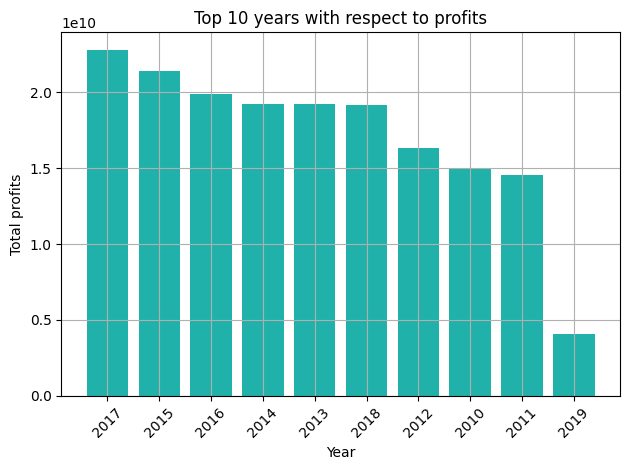

In [86]:
# Convert release date to datetime format and extract release year
df6['Release Year'] = pd.to_datetime(df6['release_date']).dt.year

# Group by year and calculate total worldwide gross
yearly_worldwide_gross = df6.groupby('Release Year')['profits'].sum()
#yearly_worldwide_gross.sort_values(yearly_worldwide_gross, ascending=False)


# Sort years based on total worldwide gross and select top 10 years
top_10_years = yearly_worldwide_gross.sort_values(ascending=False).head(10)

# Plot bar chart
plt.bar(top_10_years.index.astype(str), top_10_years.values, color='lightseagreen')

# Customize plot
plt.xlabel('Year')
plt.ylabel('Total profits')
plt.title('Top 10 years with respect to profits')
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

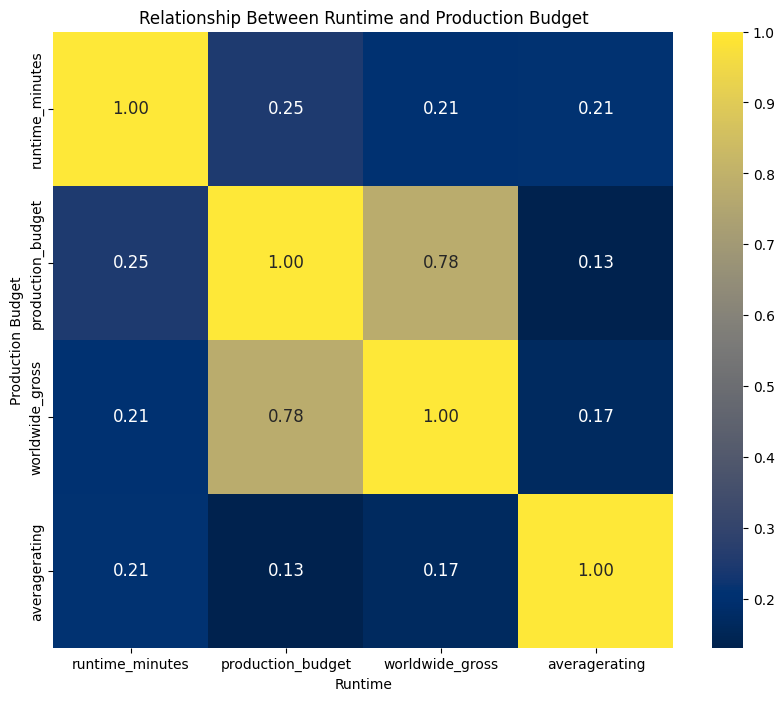

In [91]:
#Plotting a heartmap correlation
plt.figure(figsize=(10, 8))
sns.heatmap(data=df6[['runtime_minutes', 'production_budget','worldwide_gross','averagerating']].corr(), annot=True, cmap='cividis', fmt=".2f", annot_kws={"size": 12})
plt.title('Relationship Between Runtime and Production Budget')
plt.xlabel('Runtime')
plt.ylabel('Production Budget')
plt.show()

### FINDINGS

- **There is a slight relationship  between a movie's runtime, averageratings and number of votes to its production budget**

- **Action adventure and SCI-FI were the most profitable in revenue**

- **Drama led in the mos produced genres**

### RECCOMENDATIONS

- **To consider venturing in genres like Action adventure ,SCI-FI and Drama**